In [2]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt

plt.rcParams['figure.dpi'] = 140

In [3]:

df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\netflix_recommender\netflix_titles.csv")
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [5]:
# 5 columns have missing values, with Director missing 1/3 of the time
# Dealing with the missing data
# This is always scenario dependant, but in this case, I will:
# replace blank countries with the mode (most common) country
# I want to keep director as it could be interesting to look at a certain director's films
# I want to keep cast as it could be interesting to look at a certain cast's films


# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [8]:
#Missing values dealt with, but the date isn't quite right yet

df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0


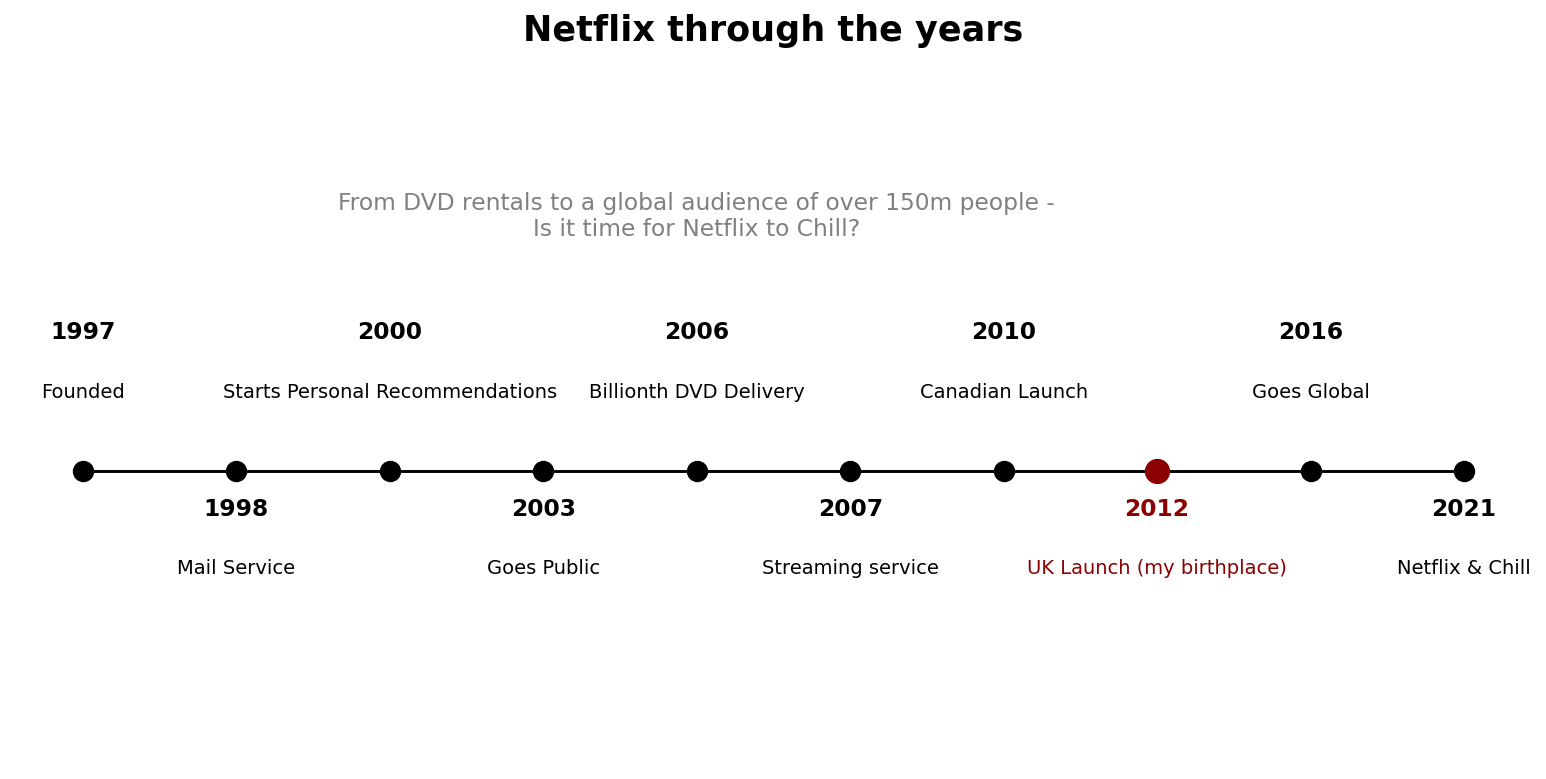

In [9]:
import matplotlib.pyplot as plt

# Timeline data
dates = [
    "1997", "1998", "2000", "2003", "2006", 
    "2007", "2010", "2012", "2016", "2021"
]
events = [
    "Founded", "Mail Service", "Starts Personal Recommendations",
    "Goes Public", "Billionth DVD Delivery", "Streaming service",
    "Canadian Launch", "UK Launch (my birthplace)", "Goes Global", "Netflix & Chill"
]
special = {"2012"}  # highlight this event

# X positions
x = list(range(len(dates)))

fig, ax = plt.subplots(figsize=(14, 6))
ax.hlines(0, 0, len(dates)-1, color="black", linewidth=1.5)

# Alternate positions for text
y_offsets = [0.3, -0.3] * (len(dates)//2 + 1)

# Markers + labels
for i, (xi, date, event) in enumerate(zip(x, dates, events)):
    if date in special:
        ax.plot(xi, 0, "o", color="darkred", markersize=12)
        ax.text(xi, y_offsets[i]+0.15, date, fontsize=12, fontweight="bold", ha="center", color="darkred")
        ax.text(xi, y_offsets[i]-0.05, event, fontsize=10, ha="center", color="darkred")
    else:
        ax.plot(xi, 0, "o", color="black", markersize=10)
        ax.text(xi, y_offsets[i]+0.15, date, fontsize=12, fontweight="bold", ha="center")
        ax.text(xi, y_offsets[i]-0.05, event, fontsize=10, ha="center")

# Title and subtitle
ax.set_title("Netflix through the years", fontsize=18, fontweight="bold", pad=40)
ax.text(len(dates)/2 - 1, 0.8,
        "From DVD rentals to a global audience of over 150m people -\nIs it time for Netflix to Chill?",
        fontsize=12, ha="center", color="gray")

# Hide axes
ax.set_ylim(-1, 1.2)
ax.axis("off")

plt.show()


In [10]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

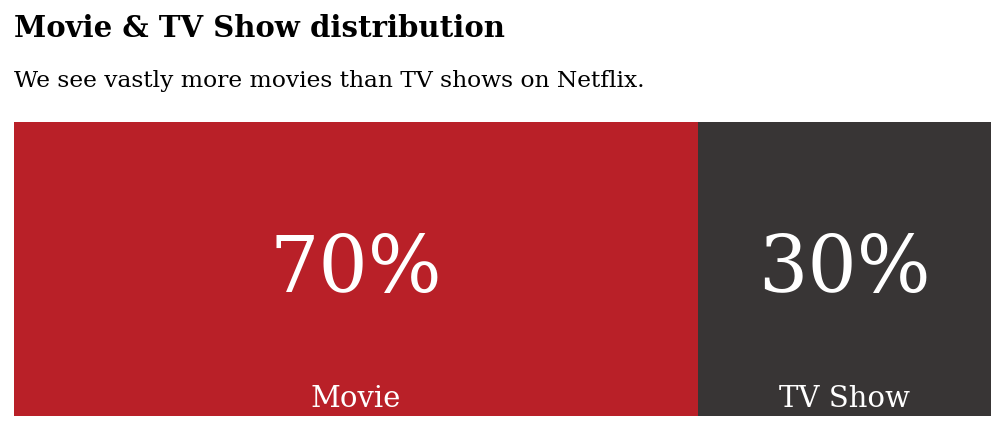

In [11]:

# Example data
mf_ratio = {"Movie": [0.7], "TV Show": [0.3]}
import pandas as pd
mf_ratio = pd.DataFrame(mf_ratio)

fig, ax = plt.subplots(figsize=(9, 3))  # Wider figure

# Bars (fill full width)
ax.barh(0, mf_ratio['Movie'][0], 
        color='#b20710', alpha=0.9)
ax.barh(0, mf_ratio['TV Show'][0], left=mf_ratio['Movie'][0], 
        color='#221f1f', alpha=0.9)

# Remove ticks
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Movie percentage
ax.annotate(f"{int(mf_ratio['Movie'][0]*100)}%", 
            xy=(mf_ratio['Movie'][0]/2, 0),
            va='center', ha='center',
            fontsize=40, fontweight='light', fontfamily='serif',
            color='white')
ax.annotate("Movie", 
            xy=(mf_ratio['Movie'][0]/2, -0.35),
            va='center', ha='center',
            fontsize=15, fontweight='light', fontfamily='serif',
            color='white')

# TV Show percentage
ax.annotate(f"{int(mf_ratio['TV Show'][0]*100)}%", 
            xy=(mf_ratio['Movie'][0] + mf_ratio['TV Show'][0]/2, 0),
            va='center', ha='center',
            fontsize=40, fontweight='light', fontfamily='serif',
            color='white')
ax.annotate("TV Show", 
            xy=(mf_ratio['Movie'][0] + mf_ratio['TV Show'][0]/2, -0.35),
            va='center', ha='center',
            fontsize=15, fontweight='light', fontfamily='serif',
            color='white')

# Title & Subtitle
fig.text(0.125, 1.05, 'Movie & TV Show distribution',
         fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.93,
         'We see vastly more movies than TV shows on Netflix.',
         fontfamily='serif', fontsize=12)

# Remove frame
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show()


In [12]:
# Quick feature engineering

# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

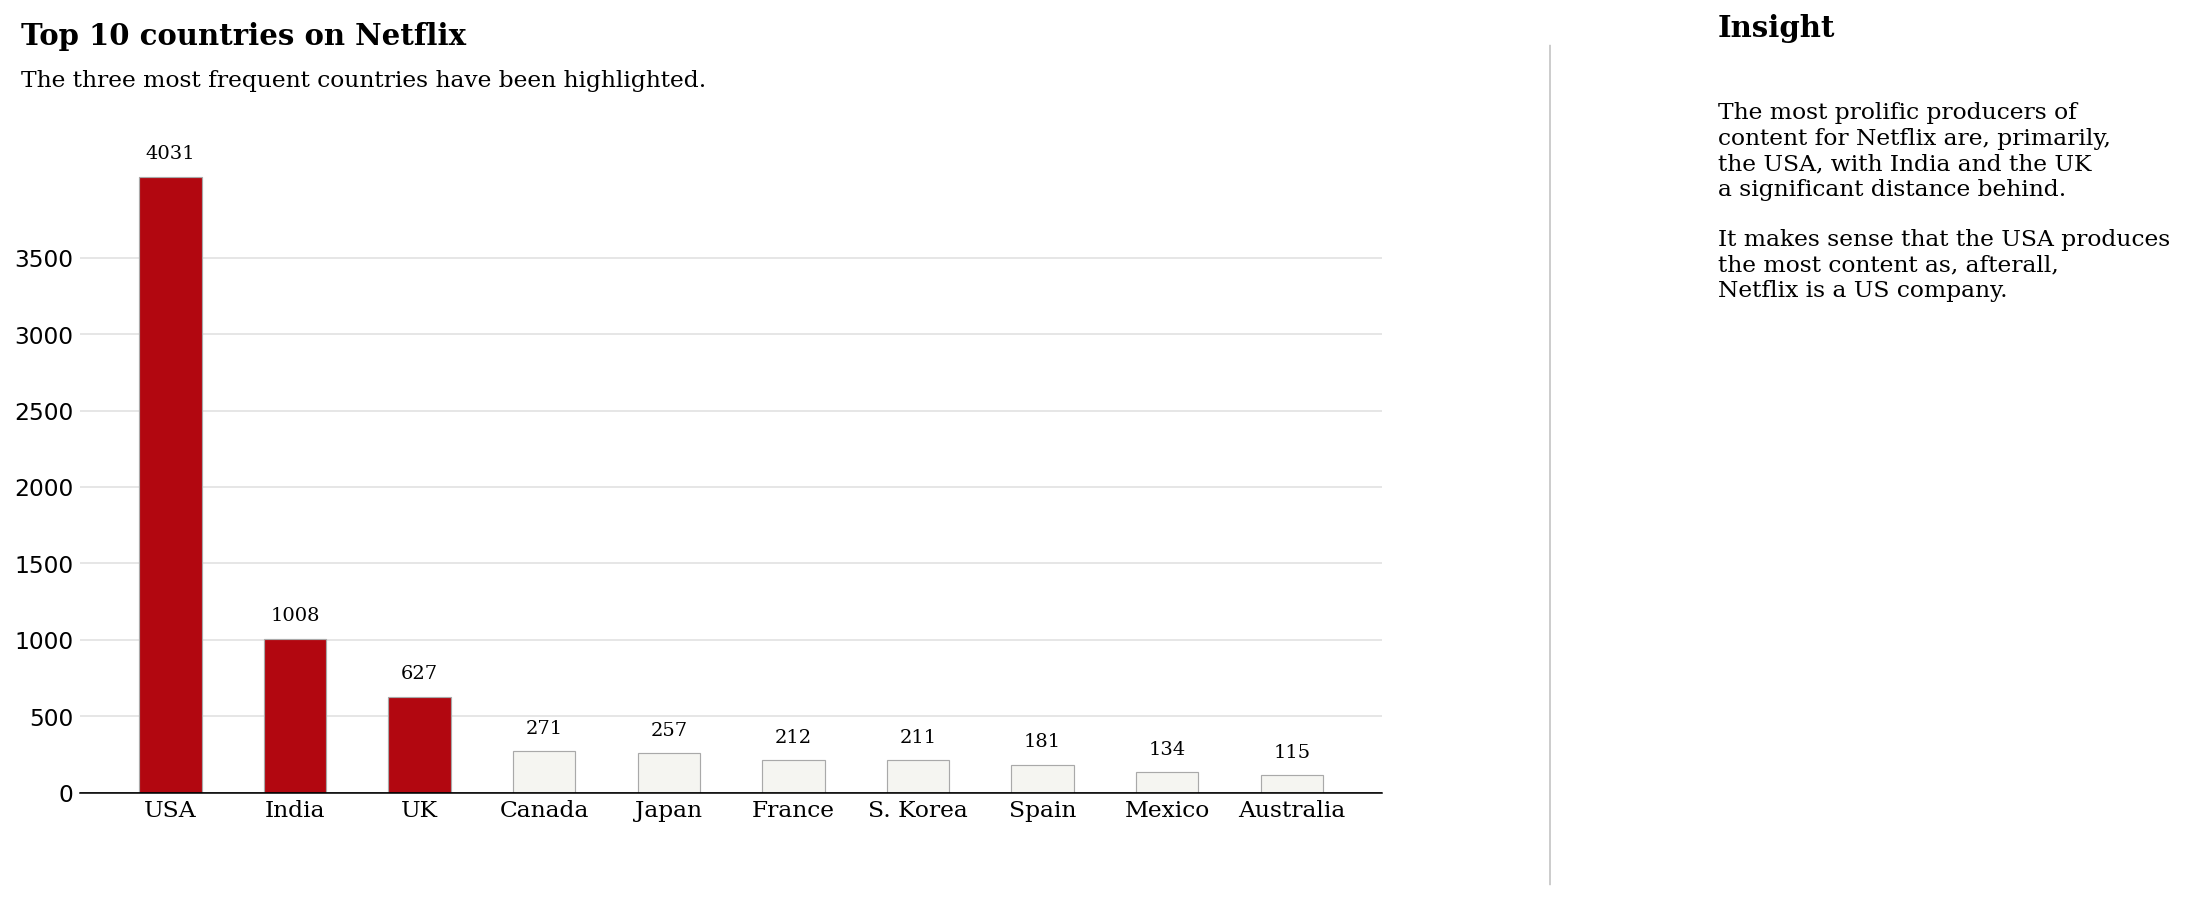

In [13]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

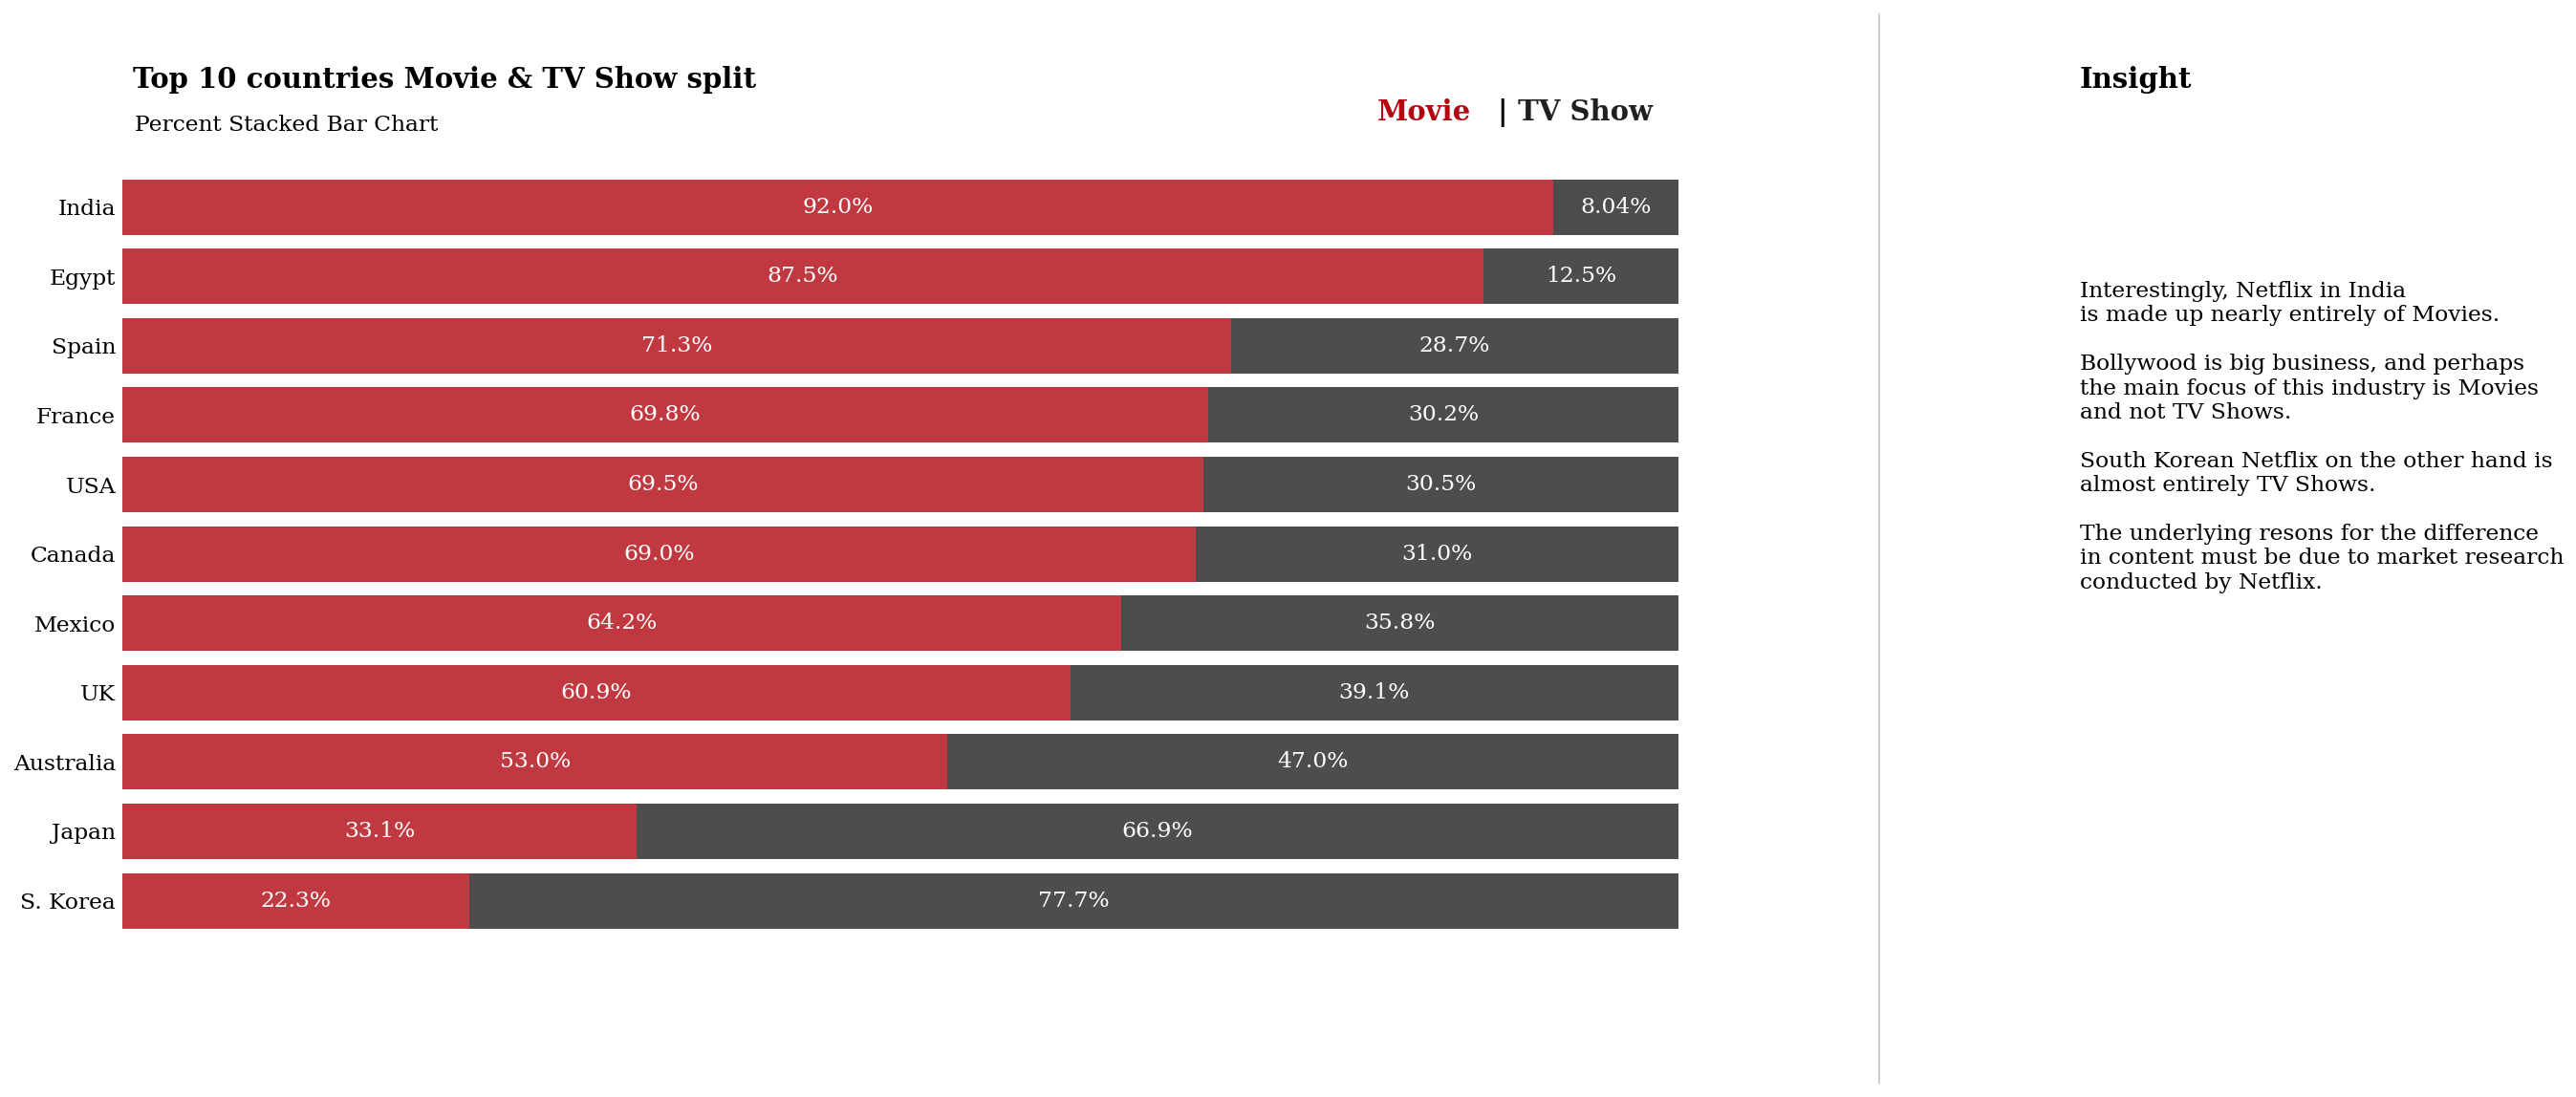

In [14]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [15]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

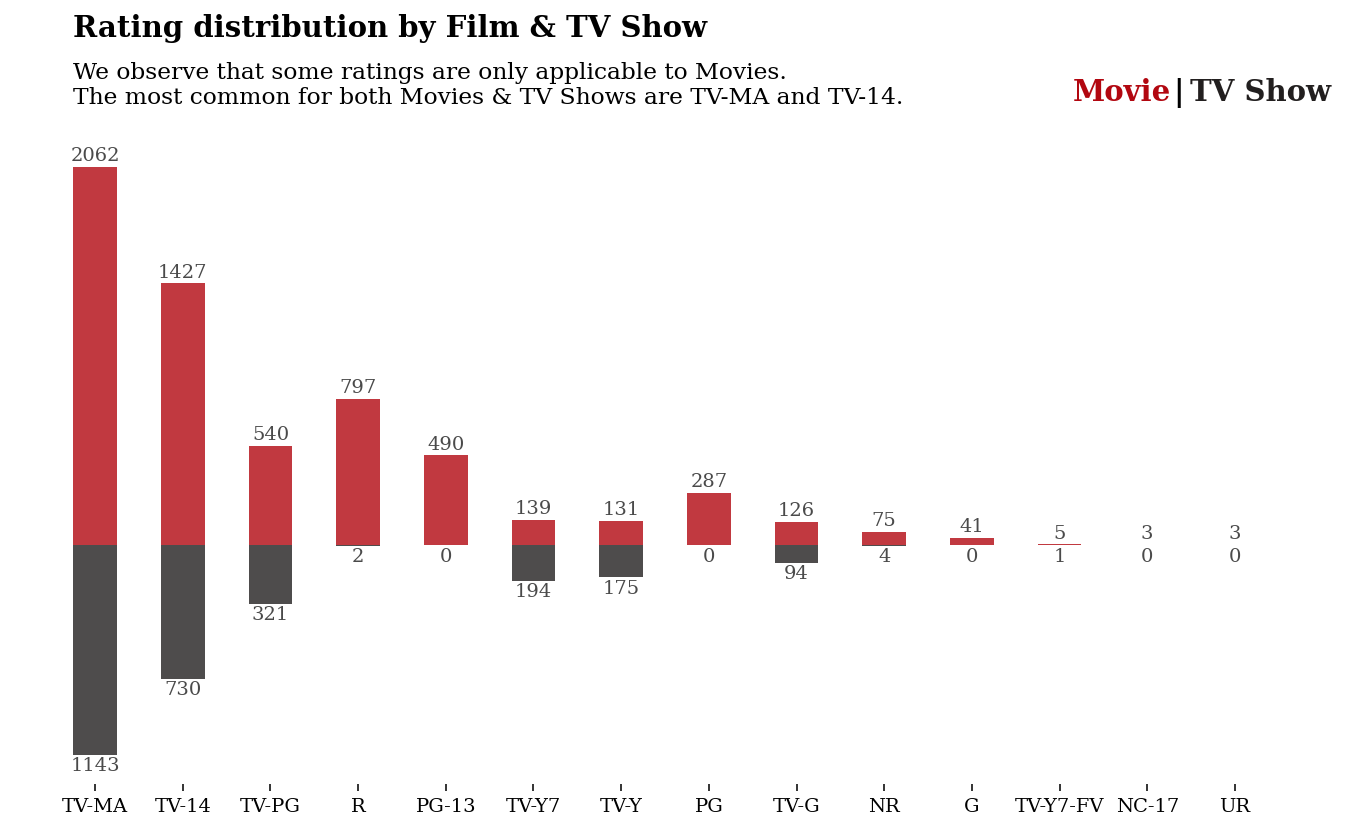

In [16]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

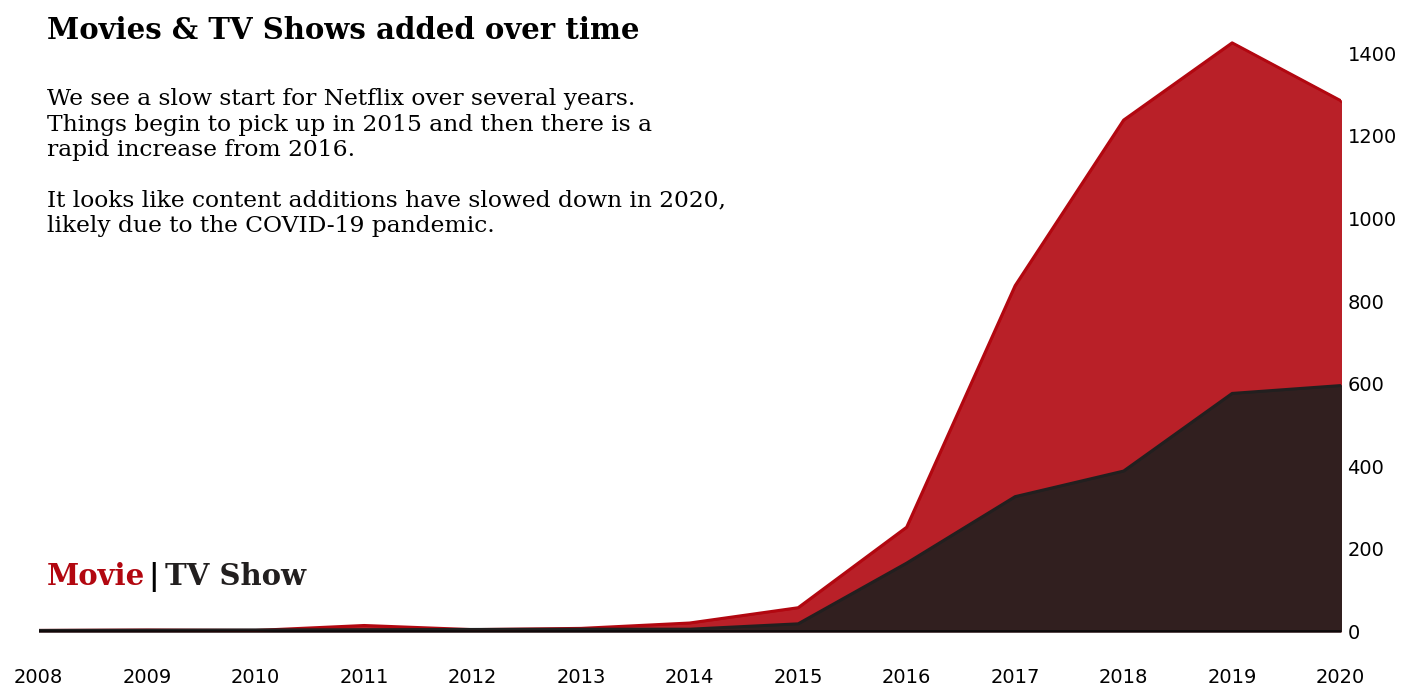

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

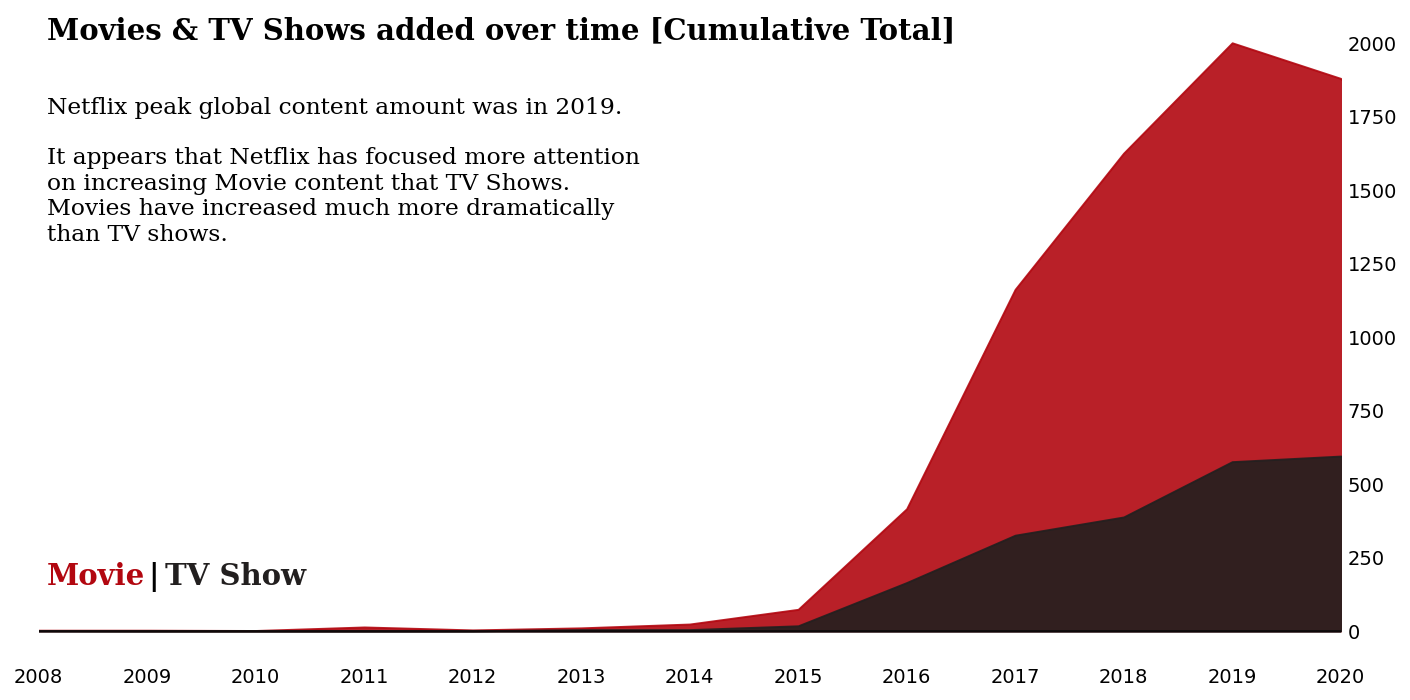

In [18]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [19]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

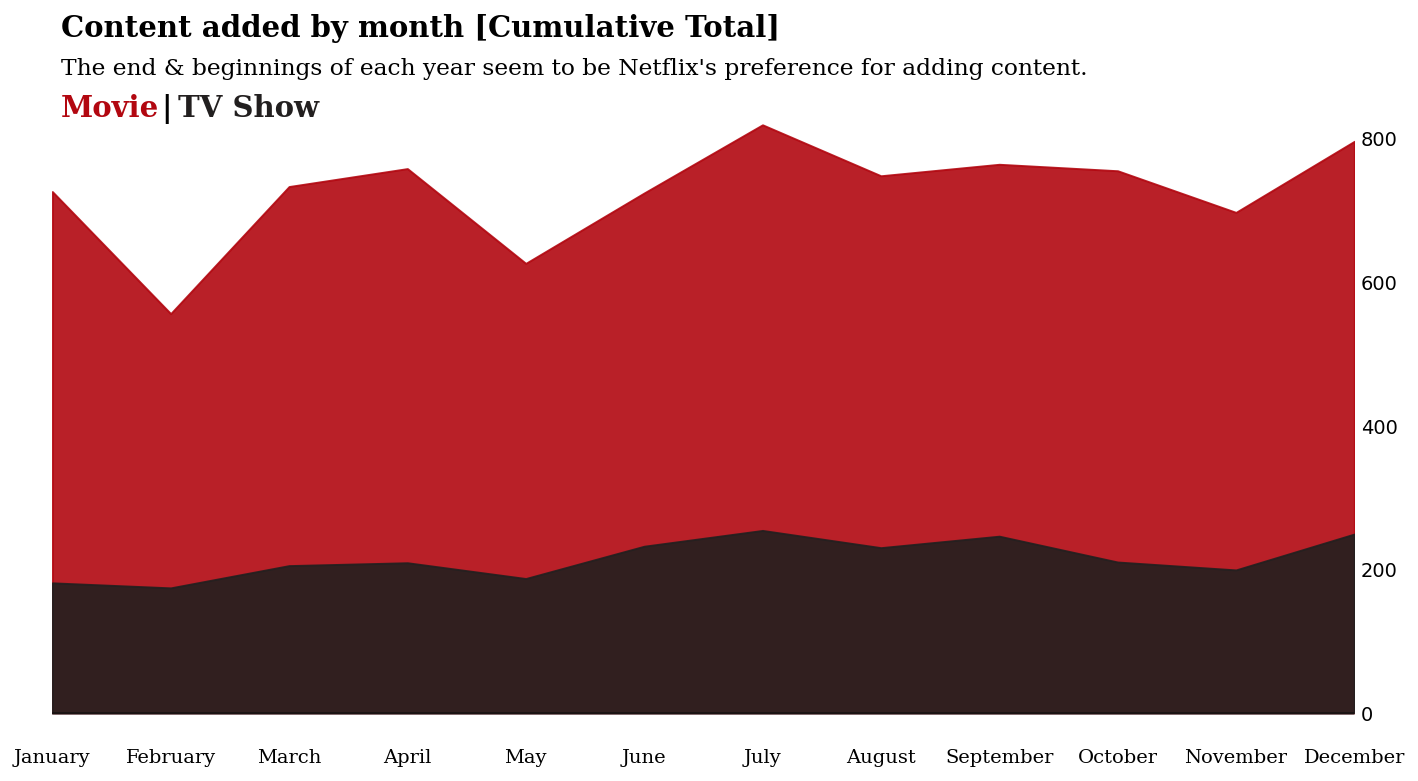

In [20]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

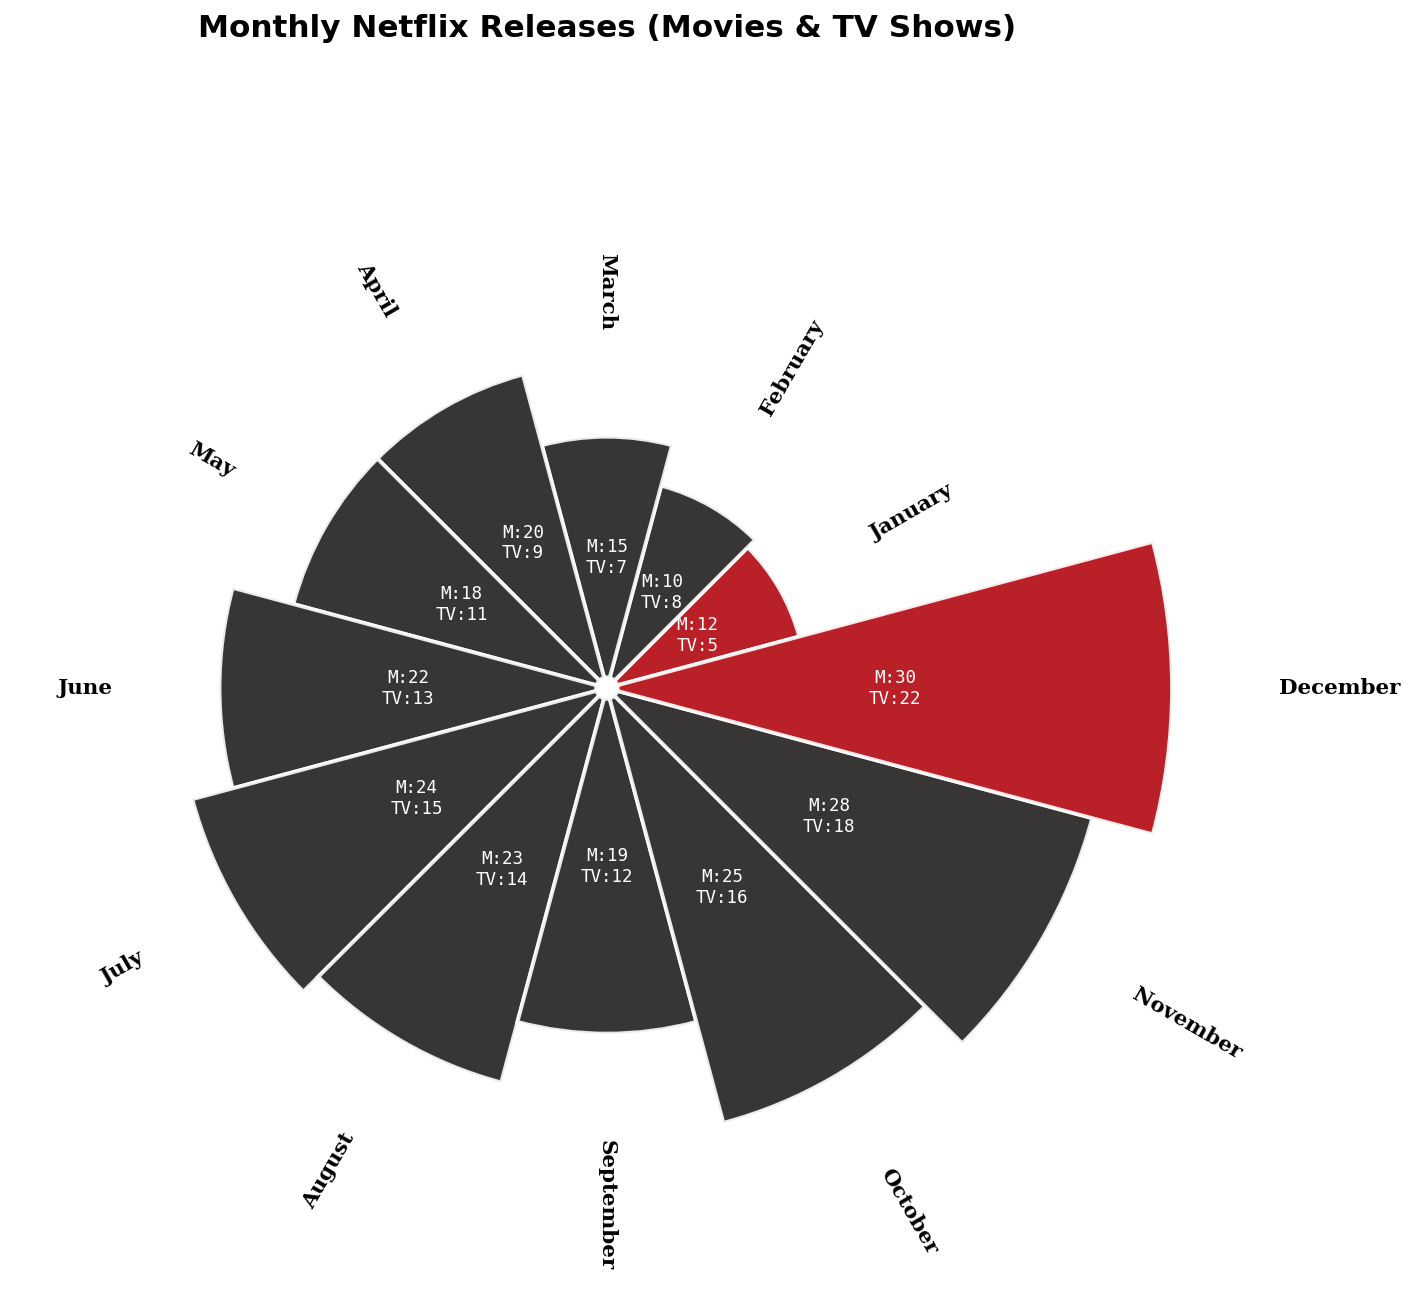

In [21]:
# Example dataset
data_sub2 = pd.DataFrame({
    "month_name_added": ["January","February","March","April","May","June",
                         "July","August","September","October","November","December"],
    "Movie": [12,10,15,20,18,22,24,23,19,25,28,30],
    "TV Show": [5,8,7,9,11,13,15,14,12,16,18,22]
})

# Total content
data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
df_polar = data_sub2

# Colors (highlight Dec & Jan)
color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] = '#b20710'  # highlight January & December

# Initialize polar plot (bigger)
plt.figure(figsize=(11,11))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants
upperLimit = 30
lowerLimit = 1
labelPadding = 10   # <<< reduced so labels appear closer to bars

# Scaling heights
max_val = df_polar['Value'].max()
slope = (max_val - lowerLimit) / max_val
heights = slope * df_polar['Value'] + lowerLimit

# Angles
width = 2*np.pi / len(df_polar.index)
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map, alpha=0.9
)

# Add month labels + counts
for bar, angle, height, month, movie, tv in zip(bars, angles, heights, 
                                                df_polar["month_name_added"], 
                                                df_polar["Movie"], 
                                                df_polar["TV Show"]):

    rotation = np.rad2deg(angle)
    alignment = "left"
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180

    # Month label closer to bar end
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=month, 
        ha=alignment, fontsize=11, fontweight="bold", fontfamily='serif',
        va='center', rotation=rotation, rotation_mode="anchor"
    )

    # Movies + TV Show count (inside bar)
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height()/2,
        s=f"M:{movie}\nTV:{tv}", 
        ha='center', va='center',
        color="white", fontsize=9, fontfamily='monospace'
    )

plt.title("Monthly Netflix Releases (Movies & TV Shows)", fontsize=16, fontweight='bold', pad=30)
plt.show()


In [22]:
# Genres Heatmap
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.colors
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

def genre_heatmap(df, title):
    # Clean and split genres
    df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(',')) 
    
    # Collect unique genres
    Types = []
    for i in df['genre']: 
        Types += i
    Types = set(Types)
    
    print("There are {} types in the Netflix {} Dataset".format(len(Types), title))    
    
    # Convert genre lists into binary matrix
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_, index=df.index)
    
    # Correlation between genres
    corr = res.corr()
    
    # Mask upper triangle (to avoid duplication)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.text(.54, .92, 'Genre Correlation Heatmap', fontfamily='serif', fontweight='bold', fontsize=16, ha='center')
    fig.text(.80, .70,
             '''
             Observations:
             • Independent Movies often overlap with Dramas.
             • International Movies rarely overlap with Children's genre.
             ''', 
             fontfamily='serif', fontsize=12, ha='right')
    
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, 
                square=True, linewidths=2.5, cbar_kws={"shrink": .5}, ax=ax)
    
    plt.show()


There are 20 types in the Netflix Movie Dataset


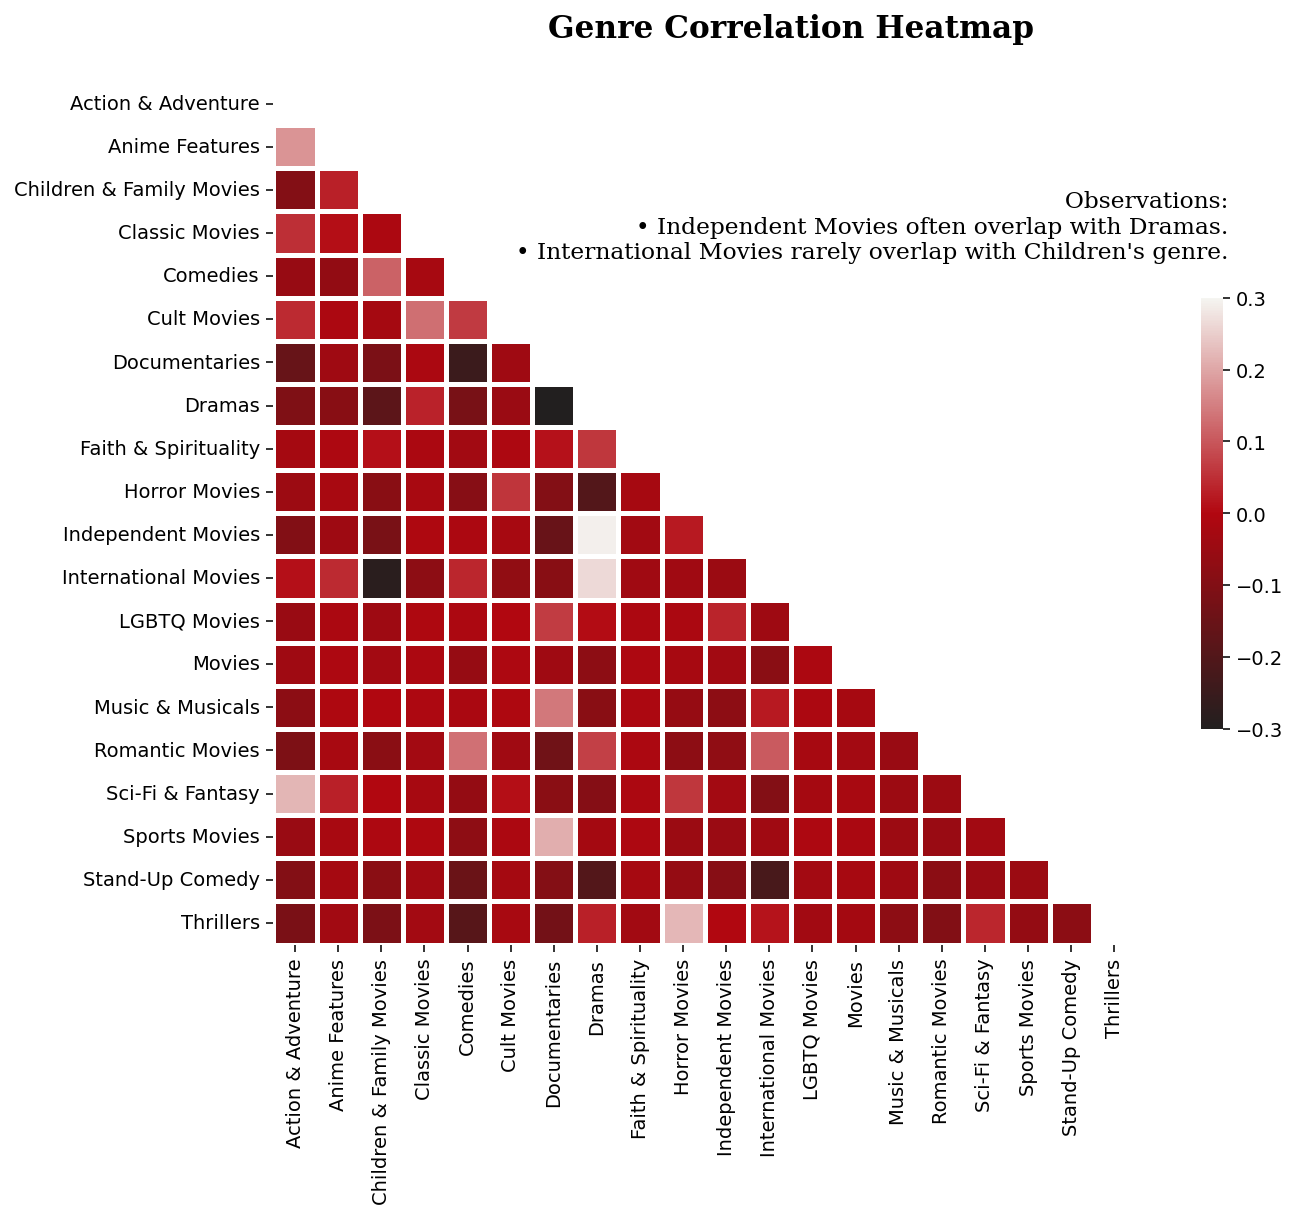

In [23]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

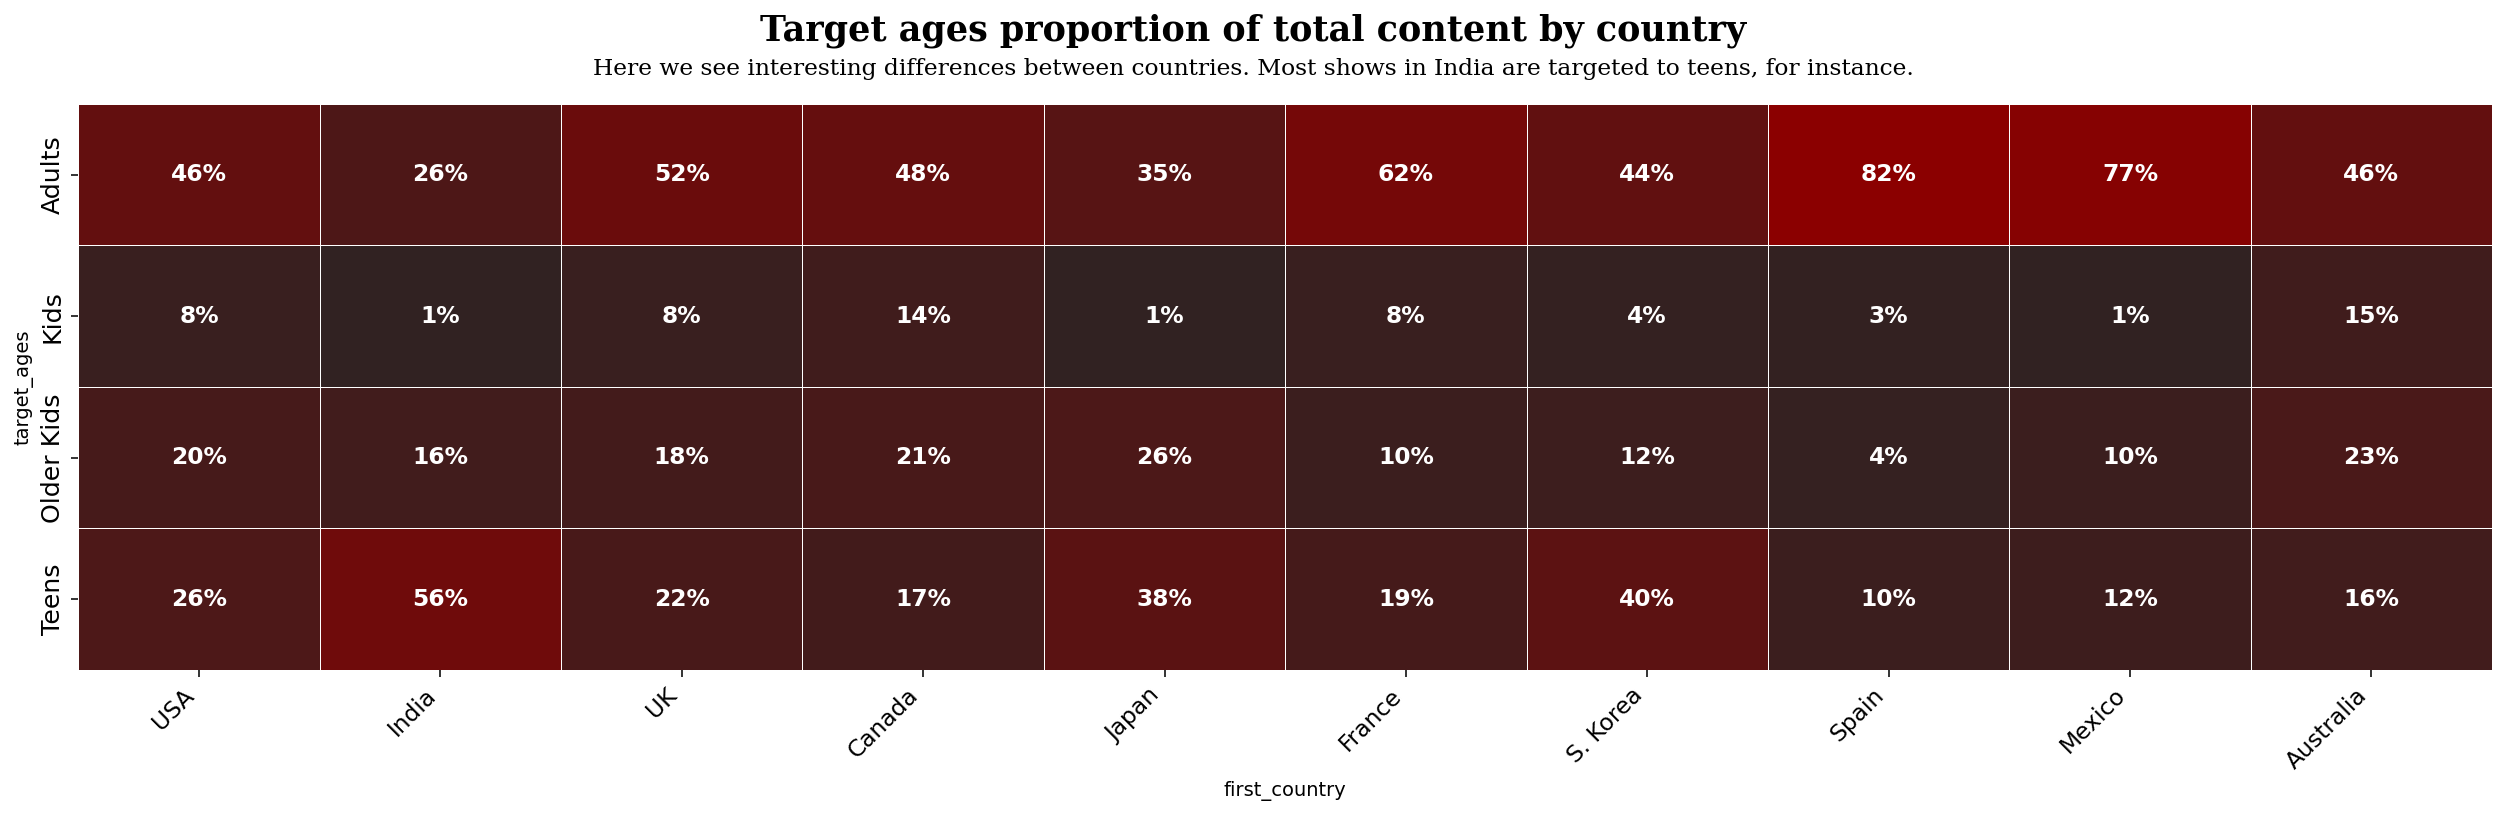

In [24]:

# --- top 10 countries ---
if 'count' in df.columns:
    top_countries = df.groupby('first_country')['count'] \
                      .sum() \
                      .nlargest(10) \
                      .index
else:
    top_countries = df['first_country'].value_counts().nlargest(10).index

df_top = df[df['first_country'].isin(top_countries)].copy()

# --- crosstab row-wise % ---
ct = pd.crosstab(df_top['first_country'], df_top['target_ages'])

# Force the rows (countries) to follow the ranking order
ct = ct.loc[top_countries]

# Normalize by row %
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
heat_df = ct_norm.T.fillna(0)

# --- annotation strings ---
annot = heat_df.round(0).astype(int).astype(str) + '%'

# --- plot ---
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(
    heat_df,
    annot=annot,
    fmt='',
    cmap=sns.color_palette("dark:#8B0000", as_cmap=True),
    cbar=False,
    linewidths=0.5,
    linecolor='white',
    annot_kws={"color": "white", "weight": "bold", "fontsize": 12},
    ax=ax
)

# Titles
fig.text(0.5, 0.93, 'Target ages proportion of total content by country',
         fontweight='bold', fontfamily='serif', fontsize=18, ha='center')
fig.text(0.5, 0.89,
         'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',
         ha='center', fontsize=12, fontfamily='serif')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=13)
plt.tight_layout(rect=[0,0,1,0.88])
plt.show()


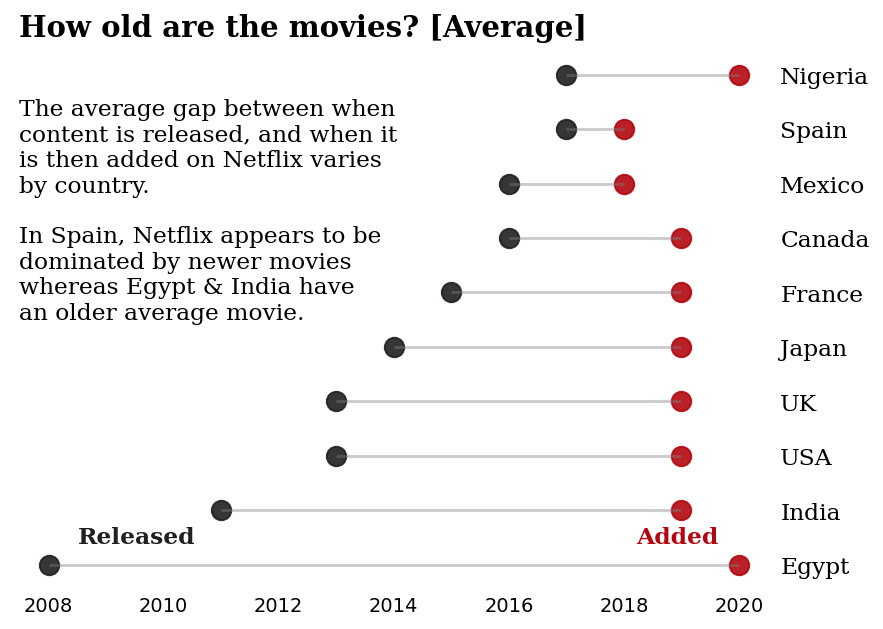

In [25]:
# Top 10 countries by movie count
top_countries = df_movies.groupby('first_country')['count'].sum().nlargest(10).index
df_loli = df_movies[df_movies['first_country'].isin(top_countries)]

# Compute average release and added year
loli = df_loli.groupby('first_country')[['release_year', 'year_added']].mean().round().reset_index()

# Sort by release year
ordered_df = loli.sort_values(by='release_year').reset_index(drop=True)
my_range = range(1, len(ordered_df)+1)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')

# Dumbbell lines
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)

# Scatter points
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f', s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710', s=100, alpha=0.9, label='Average added date')


# Axes style
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.yaxis.tick_right()

# Y-axis labels
plt.yticks(my_range, ordered_df['first_country'])
plt.yticks(fontname="serif", fontsize=12)

# Custom legend
fig.text(0.19, 0.175, "Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76, 0.175, "Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')

# Annotation text
fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
''', fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

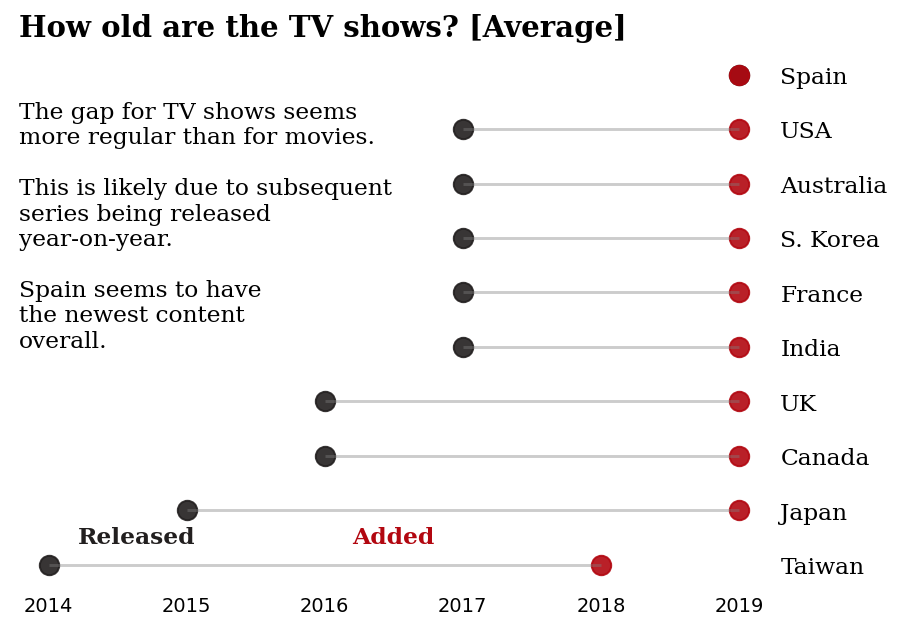

In [26]:
# Top 10 countries by TV show count
top_countries = df_tv.groupby('first_country')['count'].sum().nlargest(10).index
df_loli = df_tv[df_tv['first_country'].isin(top_countries)]

# Compute average release and added year
loli = df_loli.groupby('first_country')[['release_year', 'year_added']].mean().round().reset_index()

# Sort by release year
ordered_df = loli.sort_values(by='release_year').reset_index(drop=True)
my_range = range(1, len(ordered_df)+1)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')

# Dumbbell lines
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)

# Scatter points
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f', s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710', s=100, alpha=0.9, label='Average added date')

# Axes style
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)
ax.yaxis.tick_right()

# Y-axis labels
plt.yticks(my_range, ordered_df['first_country'])
plt.yticks(fontname="serif", fontsize=12)

# Custom legend
fig.text(0.19, 0.175, "Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.47, 0.175, "Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')

# Annotation text
fig.text(0.13, 0.42, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Spain seems to have
the newest content
overall.
''', fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

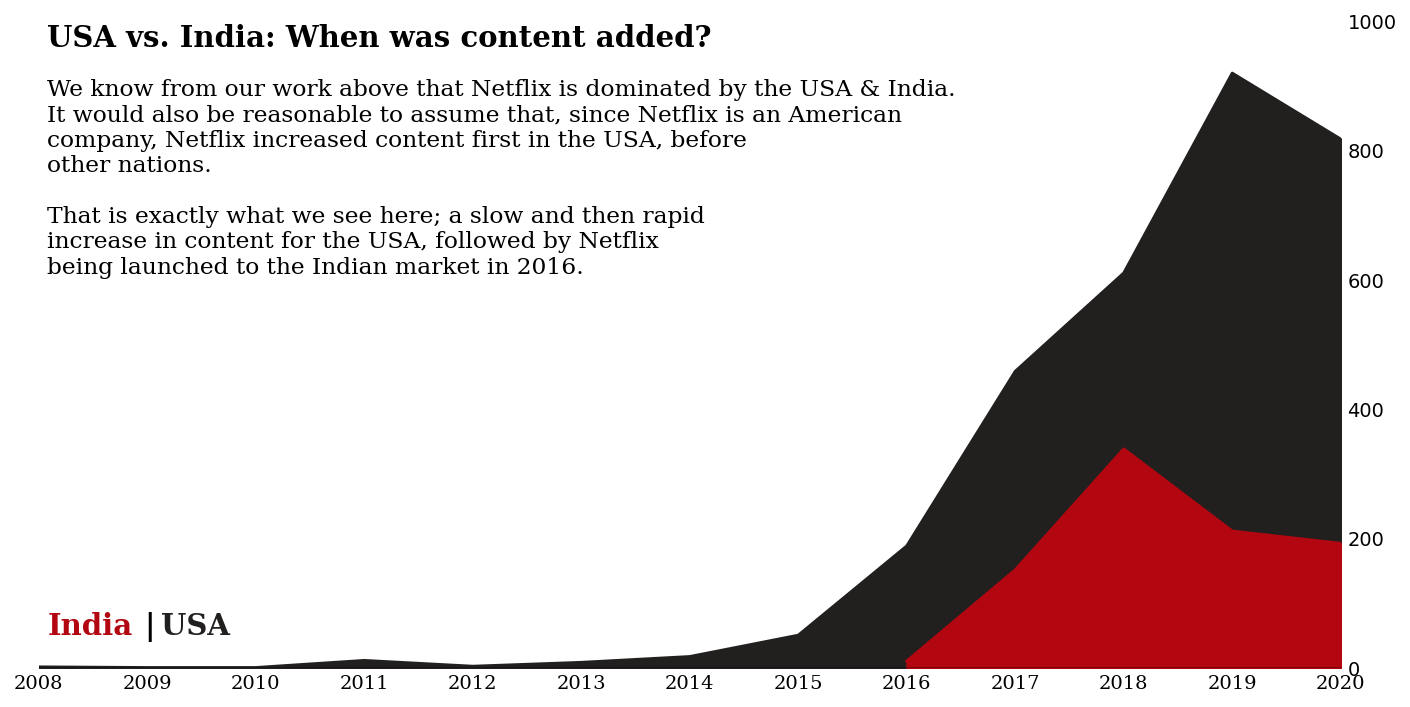

In [27]:

# Filter dataset for only USA & India rows
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India')]

# (Optional) Build a cumulative count table if you want to use it for tick labels
data_sub = (
    df.groupby('first_country')['year_added']
    .value_counts()
    .unstack()
    .fillna(0)
    .loc[['USA','India']]
    .cumsum(axis=0)
    .T
)

# Create figure & axis
fig, ax = plt.subplots(figsize=(12,6))

# Define colors for USA and India (3rd color unused)
colors = ['#221f1f', '#b20710', '#f5f5f1']

# Loop over each country and plot the filled area
for i, country in enumerate(us_ind['first_country'].value_counts().index):
    # Count titles added per year for this country
    hs_built = (
        us_ind[us_ind['first_country']==country]['year_added']
        .value_counts()
        .sort_index()
    )
    # Make sure x-values (years) are numeric for plotting
    hs_built.index = hs_built.index.astype(int)

    # Plot the filled area under the line
    ax.fill_between(
        hs_built.index,
        0,
        hs_built,
        color=colors[i],
        label=country
    )
    # Optionally also draw the line on top
    ax.plot(hs_built.index, hs_built, color=colors[i])

# Set y-axis limit
ax.set_ylim(0, 1000)

# Hide spines for a clean look
for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)

# Move y-axis ticks to the right (like your figure)
ax.yaxis.tick_right()

# Add horizontal baseline at y=0
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.4)

# Turn off grid
ax.grid(False)

# Set x-axis tick labels & ticks
ax.set_xlim(2008,2020)
ax.set_xticks(np.arange(2008,2021,1))
ax.set_xticklabels(np.arange(2008,2021,1), fontfamily='serif', rotation=0)

# Remove tick marks (but keep labels)
ax.tick_params(axis='both', which='both', length=0)

# Remove white space next to margins
ax.margins(x=0)

# Add figure titles and annotations
fig.text(0.13, 0.85, 'USA vs. India: When was content added?',
         fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13, 0.58,
'''We know from our work above that Netflix is dominated by the USA & India.
It would also be reasonable to assume that, since Netflix is an American
company, Netflix increased content first in the USA, before 
other nations.

That is exactly what we see here; a slow and then rapid
increase in content for the USA, followed by Netflix 
being launched to the Indian market in 2016.''',
fontsize=12, fontweight='light', fontfamily='serif')

# Small color key at bottom
fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif',
         fontsize=15, color='#b20710')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif',
         fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif',
         fontsize=15, color='#221f1f')

plt.show()


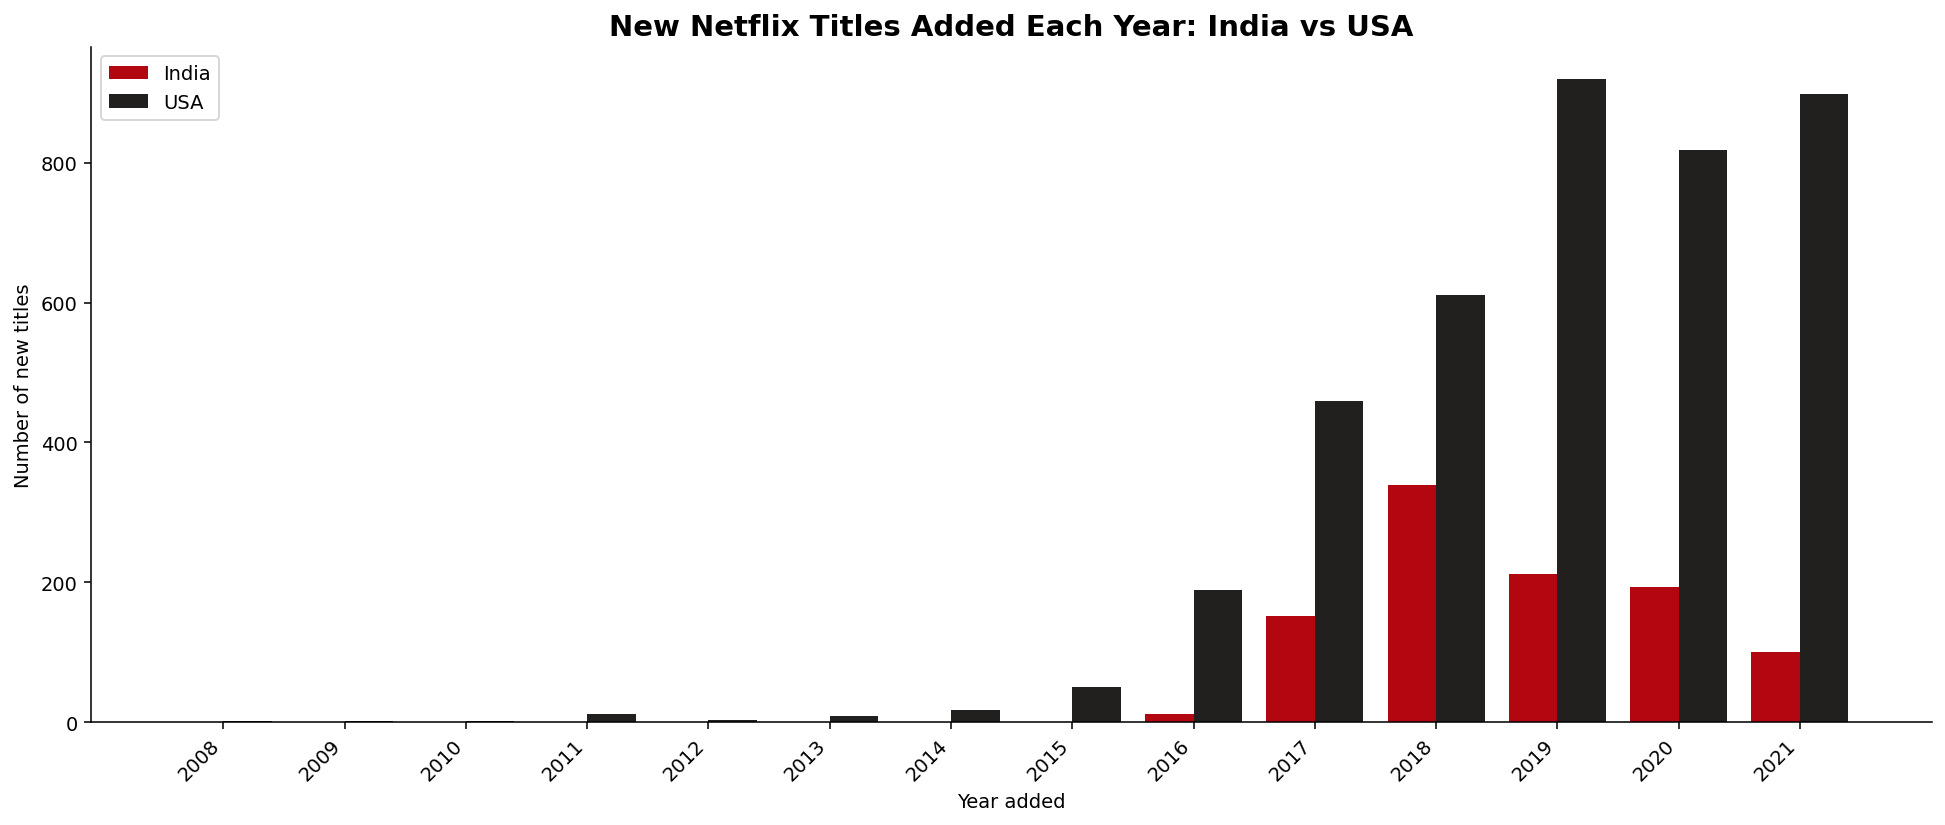

In [28]:
# 1. Filter to USA & India only
# -------------------------------------------------
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India')]

# -------------------------------------------------
# 2. Count new content per year per country
# -------------------------------------------------
counts = (
    us_ind.groupby(['year_added','first_country'])
    .size()
    .unstack(fill_value=0)
    .loc[:, ['India','USA']]   # keep order
)

# Sort by year
counts = counts.sort_index()
counts.index = counts.index.astype(int) 

# -------------------------------------------------
# 3. Create a side-by-side bar chart
# -------------------------------------------------
years = counts.index
ind = np.arange(len(years))       # x positions
width = 0.4                       # bar width

fig, ax = plt.subplots(figsize=(14,6))

# India bars (red)
ax.bar(ind - width/2, counts['India'], width, label='India', color='#b20710')
# USA bars (black)
ax.bar(ind + width/2, counts['USA'], width, label='USA', color='#221f1f')

# -------------------------------------------------
# 4. Axes & labels
# -------------------------------------------------
ax.set_xticks(ind)
ax.set_xticklabels(years, rotation=45, ha='right')
ax.set_ylabel('Number of new titles')
ax.set_xlabel('Year added')
ax.set_title('New Netflix Titles Added Each Year: India vs USA', fontsize=15, fontweight='bold')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

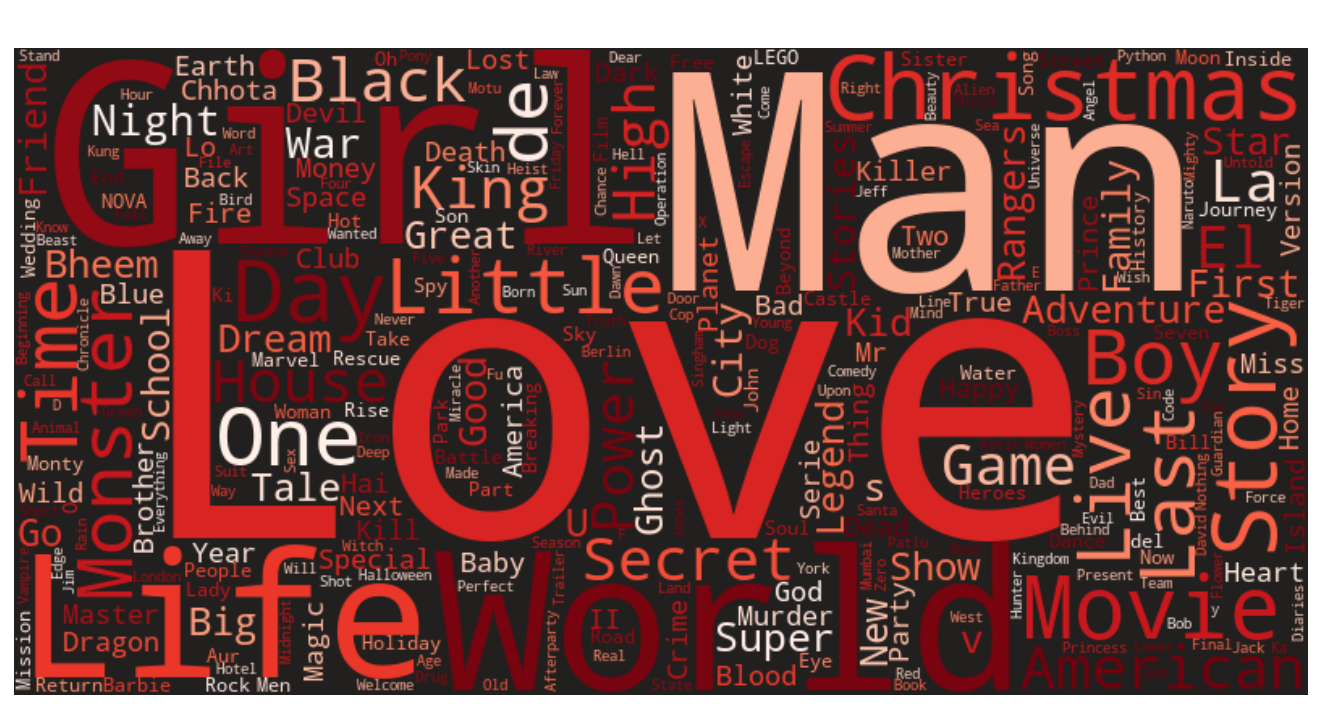

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. Combine all titles into one string
# -------------------------------------------------
# This will join all movie titles with a space in between
all_titles = ' '.join(df['title'].astype(str))

# -------------------------------------------------
# 2. Create WordCloud for movie names
# -------------------------------------------------
wc = WordCloud(
    width=800, height=400,
    background_color="#221f1f",  # Netflix black background
    colormap="Reds",            # Shades of Netflix red
    max_words=300,              # show up to 300 titles
    collocations=False          # ensures full titles instead of pairing words
).generate(all_titles)

# -------------------------------------------------
# 3. Display
# -------------------------------------------------
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Movie Titles on Netflix", fontsize=16, fontweight='bold', color="white")
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\New folder (2)\netflix_titles.csv")
# Target column: Predict whether it's a Movie or TV Show
target_column = 'type'

# Feature Engineering: convert 'duration' to numeric
def convert_duration(value):
    if pd.isna(value):
        return 0
    if 'Season' in str(value):
        return int(value.split(' ')[0]) * 30  # rough season length
    if 'min' in str(value):
        return int(value.split(' ')[0])
    return 0

df['duration_numeric'] = df['duration'].apply(convert_duration)

# Features
X = df[['release_year', 'duration_numeric']]

# Encode target
le = LabelEncoder()
y = le.fit_transform(df[target_column])  # Movie=0, TV Show=1

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Best model → Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=0)
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Random Forest Accuracy: {accuracy}")


Confusion Matrix:
[[1196   52]
 [   8  506]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1248
           1       0.91      0.98      0.94       514

    accuracy                           0.97      1762
   macro avg       0.95      0.97      0.96      1762
weighted avg       0.97      0.97      0.97      1762


✅ Final Random Forest Accuracy: 0.9659477866061293


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# ----- STEP 1: Data Preparation -----
# Fill NaN genres
df['listed_in'] = df['listed_in'].fillna('')
df['rating'] = df['rating'].fillna('')  # optional if exists
df['country'] = df['country'].fillna('')

# ----- STEP 2: Content-Based (Genres + Description) -----
df['combined_features'] = df['listed_in'] + ' ' + df['description'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_content_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return []
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # top 10
    movie_indices = [i[0] for i in sim_scores]
    return df.iloc[movie_indices][['title', 'listed_in', 'release_year']]

# ----- STEP 3: Popularity-Based (Hybrid Part) -----
# Example: Assume we use "IMDb_score" or "user_rating_score" column for popularity
if 'user_rating_score' in df.columns:
    df['popularity_score'] = df['user_rating_score']
else:
    # Fake popularity using random or release_year
    df['popularity_score'] = (df['release_year'] - df['release_year'].min()) / \
                             (df['release_year'].max() - df['release_year'].min())

def get_hybrid_recommendations(title, weight_content=0.7, weight_popularity=0.3):
    recommendations = get_content_recommendations(title)
    if recommendations.empty:
        return []
    
    # Merge popularity
    recommendations = recommendations.merge(df[['title', 'popularity_score']], on='title', how='left')
    
    # Final hybrid score
    recommendations['hybrid_score'] = weight_content * 1.0 + weight_popularity * recommendations['popularity_score']
    
    # Sort and return
    return recommendations.sort_values('hybrid_score', ascending=False).head(5)

# ----- STEP 4: Example -----
print(get_hybrid_recommendations("Narcos"))


                                 title  \
6  Cocaine Cowboys: The Kings of Miami   
4                            Ganglands   
1                       Narcos: Mexico   
9                              Top Boy   
5                 El final del paraíso   

                                           listed_in  release_year  \
6                         Crime TV Shows, Docuseries          2021   
4  Crime TV Shows, International TV Shows, TV Act...          2021   
1   Crime TV Shows, TV Action & Adventure, TV Dramas          2020   
9  British TV Shows, Crime TV Shows, Internationa...          2019   
5  Crime TV Shows, International TV Shows, Spanis...          2019   

   popularity_score  hybrid_score  
6          1.000000      1.000000  
4          1.000000      1.000000  
1          0.989583      0.996875  
9          0.979167      0.993750  
5          0.979167      0.993750  
